In [6]:
import pandas as pd
import json

In [21]:
%matplotlib inline

In [3]:
df = pd.read_json('raw_1.json')

In [4]:
df.head()

,Cells,Id,Number
0,"{u'KRT': None, u'DDOC': u'15.11.2004', u'NREG'...",66eb6f97-2a7e-477f-bbdd-80b7467c55df,1
1,"{u'KRT': u'3', u'DDOC': u'14.11.2002', u'NREG'...",c1b4f336-86c9-4ed3-9222-6147d2eac555,2
2,"{u'KRT': None, u'DDOC': u'22.11.2004', u'NREG'...",95c0747d-2ad1-4437-8565-a0b32854ba31,3
3,"{u'KRT': u'3', u'DDOC': u'19.08.2004', u'NREG'...",17b34df1-fbf9-4afa-9e5e-4832a35d7f10,4
4,"{u'KRT': u'2', u'DDOC': u'14.11.2002', u'NREG'...",ae8c7f85-db45-4cd7-8827-222cf1a579e3,5


In [5]:
df.iloc[0,0]

{u'ADRES': u'\u041f\u0435\u0442\u0440\u043e\u0432\u0441\u043a\u043e-\u0420\u0430\u0437\u0443\u043c\u043e\u0432\u0441\u043a\u0430\u044f \u0430\u043b\u043b\u0435\u044f, \u0434\u043e\u043c 6',
 u'AdmArea': [u'\u0421\u0435\u0432\u0435\u0440\u043d\u044b\u0439 \u0430\u0434\u043c\u0438\u043d\u0438\u0441\u0442\u0440\u0430\u0442\u0438\u0432\u043d\u044b\u0439 \u043e\u043a\u0440\u0443\u0433'],
 u'DDOC': u'15.11.2004',
 u'DMT': u'6',
 u'DREG': u'22.11.2004',
 u'KADNOMZU': None,
 u'KAD_KV': 0,
 u'KAD_RN': 0,
 u'KAD_ZU': 0,
 u'KRT': None,
 u'NDOC': u'8933',
 u'NREG': 9008614,
 u'SOOR': u'\u0421\u0442\u0440\u043e\u0435\u043d\u0438\u0435',
 u'STRT': None,
 u'TDOC': u'\u0420\u0430\u0441\u043f\u043e\u0440\u044f\u0436\u0435\u043d\u0438\u0435 \u043f\u0440\u0435\u0444\u0435\u043a\u0442\u0443\u0440\u044b \u0410\u041e \u0433\u043e\u0440\u043e\u0434\u0430 \u041c\u043e\u0441\u043a\u0432\u044b',
 u'UNOM': 19630,
 u'VLD': u'\u0414\u043e\u043c',
 u'VYVAD': u'\u0430\u0434\u0440\u0435\u0441 \u0443\u0442\u0432\u0435

In [55]:
DF = pd.DataFrame.from_dict(df['Cells'].tolist())

In [56]:
DF.head(3)

,ADRES,AdmArea,DDOC,DMT,DREG,KADNOMZU,KAD_KV,KAD_RN,KAD_ZU,KRT,NDOC,NREG,SOOR,STRT,TDOC,UNOM,VLD,VYVAD,geoData,global_id
0,"Петровско-Разумовская аллея, дом 6",[Северный административный округ],15.11.2004,6,22.11.2004,None,0,0,0,None,8933,9008614,Строение,None,Распоряжение префектуры АО города Москвы,19630,Дом,адрес утвержден распорядительным документом,"{u'type': u'Polygon', u'coordinates': [[[37.56...",20997012
1,"Чертановская улица, дом 23, корпус 3",[Южный административный округ],14.11.2002,23,24.12.2002,None,0,0,0,3,01-41-2445,5004404,Строение,None,Распоряжение префектуры АО города Москвы,28857,Дом,адрес утвержден распорядительным документом,"{u'type': u'Polygon', u'coordinates': [[[37.59...",20998134
2,"3-я Новоостанкинская улица, дом 21",[Северо-Восточный административный округ],22.11.2004,21,24.11.2004,None,0,0,0,None,3806,2205616,Строение,None,Распоряжение префектуры АО города Москвы,16719,Дом,адрес утвержден распорядительным документом,"{u'type': u'Polygon', u'coordinates': [[[37.62...",20997019


In [78]:
DF['AdmArea'] = DF['AdmArea'].apply(lambda x: ', '.join(x))

In [79]:
#DF.rename(columns={'geoData':'geometry'}, inplace=1)

In [80]:
import geopandas as gp
from shapely.geometry import shape

In [81]:
x = DF.iloc[10,-2]
z = shape(x)

AttributeError: 'numpy.int64' object has no attribute 'get'

In [82]:
def processGeom(x):
    try:
        return shape(x)
    except:
        return pd.np.NAN

In [83]:
DF['geometry'] = DF['geoData'].apply(processGeom)

In [84]:
print DF.shape
DF[pd.isnull(DF['geometry'])].to_csv('problematic_csv', encoding='utf8')

(153715, 21)


In [85]:
G = DF[pd.notnull(DF['geometry'])] #.to_csv('problematic_csv', encoding='utf8')

In [86]:
G2 = gp.GeoDataFrame(G, geometry='geometry')

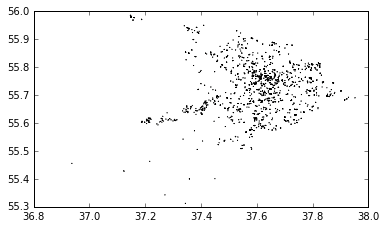

In [87]:
G2.ix[:1000,:].plot()

In [88]:
G2.crs = {'init': 'epsg:4326', 'no_defs': True}

In [93]:
with open('footprint2utf.json','w') as f:
    f.write(G2.to_json(encoding='utf8') )

In [90]:
#?G2.to_file('footprint2.shp', enc)

In [96]:
for i, x in enumerate(pd.np.array_split(G2, 4)):
    print i
    with open('footprint2utf_{0}.json'.format(i),'w') as f:
        f.write(x.to_json(encoding='utf8') )

0
1
2
3
